In [1]:
import joblib 
import numpy as np
import pandas as pd
# import talib as ta
import talib.abstract as ta
# import pandas_ta as ta
from ta import add_all_ta_features
import joblib

# from mplfinance.original_flavor import candlestick_ohlc
import seaborn as sns
import matplotlib.pyplot as plt
# import matplotlib.dates as mpdates
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
df = joblib.load('data/populated.joblib')


##15 + 7 = 22 days data
start = '2023-02-01'
end = '2023-02-22'
df = df.loc[start:end]

# df.dropna(inplace=True)

# df = df.reset_index()

# create a StandardScaler object
scaler = StandardScaler()

# normalize the data in the DataFrame
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print(df.shape)
df.tail(3)

(6336, 869)


,open,high,low,close,volume,%-BTCUSDTpct-change,%-BTCUSDTraw_volume,%-BTCUSDTraw_close,%-BTCUSDTraw_open,%-BTCUSDTraw_high,...,%-BTCUSDTmacdsignal_shift-5,%-BTCUSDTmacdhist_shift-5,%-BTCUSDTao_shift-5,%-BTCUSDTuo_shift-5,%-BTCUSDTaroonup_shift-5,%-BTCUSDTaroondown_shift-5,%-BTCUSDTaroonosc_shift-5,%-BTCUSDTsar_shift-5,%-BTCUSDThtsine_shift-5,%-BTCUSDThtleadsine_shift-5
6333,0.245136,0.247451,0.255360,0.266040,-0.317086,0.498933,-0.317086,0.266040,0.245136,0.247451,...,1.753710,1.460371,2.451510,1.535106,1.294133,-1.308627,1.540153,0.186743,0.308828,-0.754245
6334,0.266173,0.271482,0.291117,0.293284,-0.266612,0.646787,-0.266612,0.293284,0.266173,0.271482,...,1.857742,1.303199,2.422175,1.749498,1.096227,-1.308627,1.422333,0.212336,0.161420,-0.853223
6335,0.293416,0.276167,0.303996,0.282084,-0.452672,-0.271533,-0.452672,0.282084,0.293416,0.276167,...,1.927943,0.878241,2.274348,0.949860,0.898322,-0.908005,1.068875,0.227675,-0.016946,-0.962366


In [3]:
def double_barrier_method(data, tp, sl):    
    d = pd.DataFrame(data, columns=['price'])
    d['returns'] =  d['price'].pct_change()
    d['cumulative_returns'] = (1 + d['returns']).cumprod() - 1
    d['action'] = np.nan

    for i in range(len(d['action'])):
        threshould = 0
        for j in range(i, len(d['cumulative_returns'])):
            ## Calculate threshould
            threshould = threshould + d['returns'].iloc[j]
            
            if threshould >= tp:
                d['action'].iloc[i] = 0
                break

            if threshould <= sl:
                d['action'].iloc[i] = 1
                break

    return np.array(d['action'].shift())



df['&-dbm'] =  double_barrier_method(np.array(df['close']), 0.03, -0.01)
df.dropna(inplace=True)
df.head(10)

,open,high,low,close,volume,%-BTCUSDTpct-change,%-BTCUSDTraw_volume,%-BTCUSDTraw_close,%-BTCUSDTraw_open,%-BTCUSDTraw_high,...,%-BTCUSDTmacdhist_shift-5,%-BTCUSDTao_shift-5,%-BTCUSDTuo_shift-5,%-BTCUSDTaroonup_shift-5,%-BTCUSDTaroondown_shift-5,%-BTCUSDTaroonosc_shift-5,%-BTCUSDTsar_shift-5,%-BTCUSDThtsine_shift-5,%-BTCUSDThtleadsine_shift-5,&-dbm
2,-0.634666,-0.619467,-0.629943,-0.596070,-0.094946,0.956469,-0.094946,-0.596070,-0.634666,-0.619467,...,0.300182,0.501604,-0.579495,-0.684923,-1.308627,0.361957,-0.394505,-1.561163,-1.180072,0.0
3,-0.595768,-0.619467,-0.604337,-0.626795,-0.368659,-0.764748,-0.368659,-0.626795,-0.595768,-0.619467,...,0.437088,0.584139,-0.400755,-0.882829,-1.308627,0.244137,-0.404061,-1.626401,-0.957837,1.0
4,-0.626644,-0.611457,-0.604337,-0.593497,-0.378286,0.821099,-0.378286,-0.593497,-0.626644,-0.611457,...,0.346639,0.677731,-0.572261,-1.080735,-1.308627,0.126318,-0.413234,-1.530542,-0.570309,0.0
5,-0.593195,-0.616898,-0.628579,-0.646925,-0.392676,-1.326589,-0.392676,-0.646925,-0.593195,-0.616898,...,0.329832,0.771023,-0.899206,-1.278640,0.293858,-0.934059,-0.422041,0.139973,1.041260,1.0
6,-0.646774,-0.641835,-0.702367,-0.639206,1.192951,0.187281,1.192951,-0.639206,-0.646774,-0.641835,...,0.027696,0.713502,-1.395603,-1.278640,0.093548,-0.816239,-0.430495,1.254806,1.355932,0.0
7,-0.639206,-0.622037,-0.614033,-0.603032,-0.465986,0.892839,-0.465986,-0.603032,-0.639206,-0.622037,...,0.012064,0.638367,-0.673956,-1.278640,1.495722,-1.640977,-0.438612,1.583331,1.172375,1.0
8,-0.603033,-0.583346,-0.585700,-0.610903,-0.182788,-0.199076,-0.182788,-0.610903,-0.603033,-0.583346,...,-0.153377,0.564523,-0.884242,0.898322,1.295412,-0.227141,-0.450649,1.518650,0.542550,1.0
9,-0.610903,-0.602238,-0.585700,-0.584718,-0.372187,0.644355,-0.372187,-0.584718,-0.610903,-0.602238,...,-0.099430,0.474170,-0.526760,0.700416,1.095101,-0.227141,-0.461964,0.798649,-0.362046,1.0
10,-0.584720,-0.596646,-0.576761,-0.601367,-0.342261,-0.416124,-0.342261,-0.601367,-0.584720,-0.596646,...,-0.322753,0.310860,-1.444835,0.502510,0.894790,-0.227141,-0.472600,-0.852326,-1.310346,1.0
11,-0.601217,-0.622037,-0.599488,-0.623011,-0.477534,-0.540074,-0.477534,-0.623011,-0.601217,-0.622037,...,-0.416825,0.158676,-0.303564,0.304605,1.495722,-0.698420,-0.482598,-1.544252,-1.202083,0.0


In [4]:
Y = df[['&-dbm']]
X = df.drop(columns=["&-dbm"])


print(X.columns)
print(X.shape)
print(X.info())

X.tail()

Index(['open', 'high', 'low', 'close', 'volume', '%-BTCUSDTpct-change',
       '%-BTCUSDTraw_volume', '%-BTCUSDTraw_close', '%-BTCUSDTraw_open',
       '%-BTCUSDTraw_high',
       ...
       '%-BTCUSDTmacdsignal_shift-5', '%-BTCUSDTmacdhist_shift-5',
       '%-BTCUSDTao_shift-5', '%-BTCUSDTuo_shift-5',
       '%-BTCUSDTaroonup_shift-5', '%-BTCUSDTaroondown_shift-5',
       '%-BTCUSDTaroonosc_shift-5', '%-BTCUSDTsar_shift-5',
       '%-BTCUSDThtsine_shift-5', '%-BTCUSDThtleadsine_shift-5'],
      dtype='object', length=869)
(6334, 869)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6334 entries, 2 to 6335
Columns: 869 entries, open to %-BTCUSDThtleadsine_shift-5
dtypes: float64(869)
memory usage: 42.0 MB
None


,open,high,low,close,volume,%-BTCUSDTpct-change,%-BTCUSDTraw_volume,%-BTCUSDTraw_close,%-BTCUSDTraw_open,%-BTCUSDTraw_high,...,%-BTCUSDTmacdsignal_shift-5,%-BTCUSDTmacdhist_shift-5,%-BTCUSDTao_shift-5,%-BTCUSDTuo_shift-5,%-BTCUSDTaroonup_shift-5,%-BTCUSDTaroondown_shift-5,%-BTCUSDTaroonosc_shift-5,%-BTCUSDTsar_shift-5,%-BTCUSDThtsine_shift-5,%-BTCUSDThtleadsine_shift-5
6331,0.238325,0.227955,0.244299,0.227294,-0.339550,-0.268504,-0.339550,0.227294,0.238325,0.227955,...,1.485688,2.133944,2.084076,2.246007,1.294133,-1.108316,1.422333,0.116444,0.410044,-0.681519
6332,0.227579,0.224781,0.253542,0.245002,-0.466949,0.419603,-0.466949,0.245002,0.227579,0.224781,...,1.637166,1.899184,2.313190,2.184901,1.492039,-1.308627,1.657973,0.154751,0.407870,-0.683124
6333,0.245136,0.247451,0.255360,0.266040,-0.317086,0.498933,-0.317086,0.266040,0.245136,0.247451,...,1.753710,1.460371,2.451510,1.535106,1.294133,-1.308627,1.540153,0.186743,0.308828,-0.754245
6334,0.266173,0.271482,0.291117,0.293284,-0.266612,0.646787,-0.266612,0.293284,0.266173,0.271482,...,1.857742,1.303199,2.422175,1.749498,1.096227,-1.308627,1.422333,0.212336,0.161420,-0.853223
6335,0.293416,0.276167,0.303996,0.282084,-0.452672,-0.271533,-0.452672,0.282084,0.293416,0.276167,...,1.927943,0.878241,2.274348,0.949860,0.898322,-0.908005,1.068875,0.227675,-0.016946,-0.962366


In [5]:
print(X.columns)
print(X.shape)
print(X.info())

X.tail()

Index(['open', 'high', 'low', 'close', 'volume', '%-BTCUSDTpct-change',
       '%-BTCUSDTraw_volume', '%-BTCUSDTraw_close', '%-BTCUSDTraw_open',
       '%-BTCUSDTraw_high',
       ...
       '%-BTCUSDTmacdsignal_shift-5', '%-BTCUSDTmacdhist_shift-5',
       '%-BTCUSDTao_shift-5', '%-BTCUSDTuo_shift-5',
       '%-BTCUSDTaroonup_shift-5', '%-BTCUSDTaroondown_shift-5',
       '%-BTCUSDTaroonosc_shift-5', '%-BTCUSDTsar_shift-5',
       '%-BTCUSDThtsine_shift-5', '%-BTCUSDThtleadsine_shift-5'],
      dtype='object', length=869)
(6334, 869)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6334 entries, 2 to 6335
Columns: 869 entries, open to %-BTCUSDThtleadsine_shift-5
dtypes: float64(869)
memory usage: 42.0 MB
None


,open,high,low,close,volume,%-BTCUSDTpct-change,%-BTCUSDTraw_volume,%-BTCUSDTraw_close,%-BTCUSDTraw_open,%-BTCUSDTraw_high,...,%-BTCUSDTmacdsignal_shift-5,%-BTCUSDTmacdhist_shift-5,%-BTCUSDTao_shift-5,%-BTCUSDTuo_shift-5,%-BTCUSDTaroonup_shift-5,%-BTCUSDTaroondown_shift-5,%-BTCUSDTaroonosc_shift-5,%-BTCUSDTsar_shift-5,%-BTCUSDThtsine_shift-5,%-BTCUSDThtleadsine_shift-5
6331,0.238325,0.227955,0.244299,0.227294,-0.339550,-0.268504,-0.339550,0.227294,0.238325,0.227955,...,1.485688,2.133944,2.084076,2.246007,1.294133,-1.108316,1.422333,0.116444,0.410044,-0.681519
6332,0.227579,0.224781,0.253542,0.245002,-0.466949,0.419603,-0.466949,0.245002,0.227579,0.224781,...,1.637166,1.899184,2.313190,2.184901,1.492039,-1.308627,1.657973,0.154751,0.407870,-0.683124
6333,0.245136,0.247451,0.255360,0.266040,-0.317086,0.498933,-0.317086,0.266040,0.245136,0.247451,...,1.753710,1.460371,2.451510,1.535106,1.294133,-1.308627,1.540153,0.186743,0.308828,-0.754245
6334,0.266173,0.271482,0.291117,0.293284,-0.266612,0.646787,-0.266612,0.293284,0.266173,0.271482,...,1.857742,1.303199,2.422175,1.749498,1.096227,-1.308627,1.422333,0.212336,0.161420,-0.853223
6335,0.293416,0.276167,0.303996,0.282084,-0.452672,-0.271533,-0.452672,0.282084,0.293416,0.276167,...,1.927943,0.878241,2.274348,0.949860,0.898322,-0.908005,1.068875,0.227675,-0.016946,-0.962366


In [6]:
print(Y.columns)
print(Y.shape)
print(Y.info())
print(Y.value_counts())

Y.tail()

Index(['&-dbm'], dtype='object')
(6334, 1)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6334 entries, 2 to 6335
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   &-dbm   6334 non-null   float64
dtypes: float64(1)
memory usage: 99.0 KB
None
&-dbm
1.0      3891
0.0      2443
dtype: int64


,&-dbm
6331,1.0
6332,1.0
6333,0.0
6334,0.0
6335,0.0


In [7]:
# Y['&s-up_down_same'] = Y['&s-up_down_same'].replace({"upper": 0, "up": 1, "down": 2})
# Y.tail(10)

In [8]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y,
                                            test_size = 0.20,
                                            shuffle=False,
                                        )

print(X_train.shape, ' ',X_test.shape, " ", y_train.shape, ' ',y_test.shape)

(5067, 869)   (1267, 869)   (5067, 1)   (1267, 1)


In [8]:
# # Correlation Removal

# # find and remove correlated features
# def correlation(dataset, threshold):
#     col_corr = set()  # Set of all the names of correlated columns
#     corr_matrix = dataset.corr()
#     for i in range(len(corr_matrix.columns)):
#         for j in range(i):
#             if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
#                 colname = corr_matrix.columns[i]  # getting the name of column
#                 col_corr.add(colname)
#     return col_corr

# corr_features = correlation(X_train, 0.95)
# print('correlated features: ', len(set(corr_features)) )
# corr_features

In [9]:
# # removed correlated  features
# X_train.drop(labels=corr_features, axis=1, inplace=True)
# X_test.drop(labels=corr_features, axis=1, inplace=True)

# print(X_train.shape, ' ',X_test.shape)

# X_train.fillna(0, inplace=True)

# Random Forest Importance

In [9]:
# Import libraries
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [11]:
# instantiate the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=5000, random_state=0)

# fit the classifier to the training set
clf.fit(X_train, y_train)

# predict on the test set
y_pred = clf.predict(X_test)

/tmp/ipykernel_13200/926593949.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


In [12]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.68      0.78       499
         1.0       0.82      0.96      0.88       768

    accuracy                           0.85      1267
   macro avg       0.87      0.82      0.83      1267
weighted avg       0.86      0.85      0.84      1267



<AxesSubplot: >

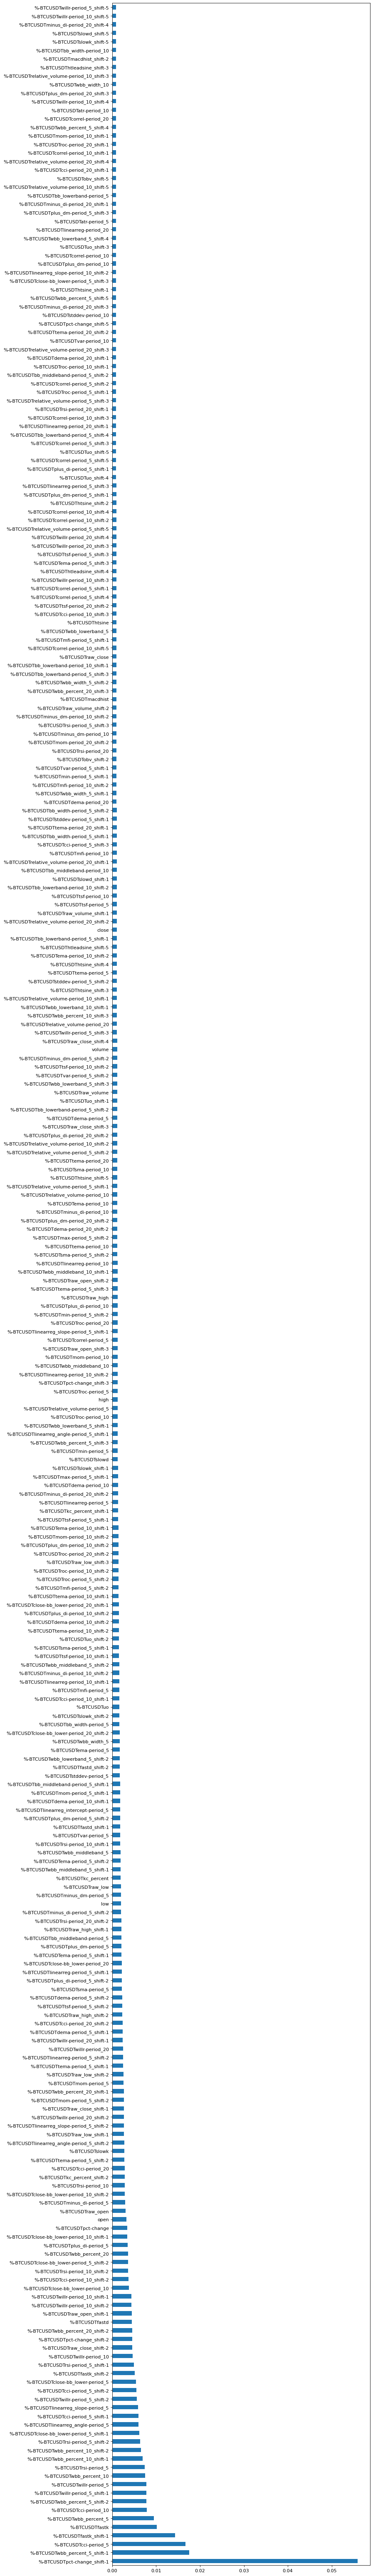

In [13]:
# visualize feature importance

plt.figure(num=None, figsize=(10,100), dpi=80, facecolor='w', edgecolor='k')

feat_importances = pd.Series(clf.feature_importances_, index= X.columns)

feat_importances.nlargest(300).plot(kind='barh')

In [14]:
fi = feat_importances.nlargest(150)
feat_imp = fi.keys()

In [15]:
for i in feat_imp:
    print(i)

%-BTCUSDTpct-change_shift-1
%-BTCUSDTwbb_percent_5_shift-1
%-BTCUSDTcci-period_5
%-BTCUSDTfastk_shift-1
%-BTCUSDTfastk
%-BTCUSDTwbb_percent_5
%-BTCUSDTcci-period_10
%-BTCUSDTwbb_percent_5_shift-2
%-BTCUSDTwillr-period_5_shift-1
%-BTCUSDTwillr-period_5
%-BTCUSDTwbb_percent_10
%-BTCUSDTrsi-period_5
%-BTCUSDTwbb_percent_10_shift-1
%-BTCUSDTwbb_percent_10_shift-2
%-BTCUSDTrsi-period_5_shift-2
%-BTCUSDTclose-bb_lower-period_5_shift-1
%-BTCUSDTlinearreg_angle-period_5
%-BTCUSDTcci-period_5_shift-1
%-BTCUSDTlinearreg_slope-period_5
%-BTCUSDTwillr-period_5_shift-2
%-BTCUSDTcci-period_5_shift-2
%-BTCUSDTclose-bb_lower-period_5
%-BTCUSDTfastk_shift-2
%-BTCUSDTrsi-period_5_shift-1
%-BTCUSDTwillr-period_10
%-BTCUSDTraw_close_shift-2
%-BTCUSDTpct-change_shift-2
%-BTCUSDTwbb_percent_20_shift-2
%-BTCUSDTfastd
%-BTCUSDTraw_open_shift-1
%-BTCUSDTwillr-period_10_shift-2
%-BTCUSDTwillr-period_10_shift-1
%-BTCUSDTclose-bb_lower-period_10
%-BTCUSDTcci-period_10_shift-2
%-BTCUSDTrsi-period_10_shift-2
%-BTCU

In [16]:
X_train_fi = X_train[feat_imp]
X_test_fi = X_test[feat_imp]

In [18]:
# instantiate the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=5000, random_state=0)

# fit the classifier to the training set
clf.fit(X_train_fi, y_train)

# predict on the test set
y_pred = clf.predict(X_test_fi)

/tmp/ipykernel_13200/2741405603.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train_fi, y_train)


In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.80      0.84       499
         1.0       0.88      0.94      0.91       768

    accuracy                           0.88      1267
   macro avg       0.88      0.87      0.87      1267
weighted avg       0.88      0.88      0.88      1267



In [ ]:
# forward feature selection

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier


sfs1 = SFS(RandomForestClassifier(),#RandomForestRegressor(), 
           k_features=100, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=3)

sfs1 = sfs1.fit(np.array(X_train_fi), y_train['&s-up_down_same'].ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 14.2min finished

[2023-01-15 00:31:44] Features: 1/100 -- score: 0.34886271695396226[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 299 out of 299 | elapsed: 11.0min finished

[2023-01-15 00:42:42] Features: 2/100 -- score: 0.8500410265410374[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 298 out of 298 | elapsed:  7.9min finished

[2023-01-15 00:50:35] Features: 3/100 -- score: 0.7934176101265163[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Do

In [ ]:
sfs1.k_feature_idx_

In [ ]:
X_train_fi.columns[list(sfs1.k_feature_idx_)]